<a href="https://colab.research.google.com/github/Toyonaga15/Python-for-finance/blob/main/Correlation_Heatmap_of_Assets_using_Yahoo_Finance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy
!pip install datetime
!pip install matplotlib
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 8.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import yfinance as yf
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Request starting date in American format (YYYY-MM-DD)
start_date = input('Enter the start date in American format to analyze (ex: 2022-12-31): ')

# Request number of assets to correlate
num_assets = int(input('How many assets do you want to correlate? '))


Enter the start date in American format to analyze (ex: 2022-12-31): 2020-01-01
How many assets do you want to correlate? 3


In [10]:
# List to store asset names
assets = []

# Loop to gather asset names
for x in range(num_assets):
    asset = input(f'Enter the ticker symbol of asset based on yahoo finance {x+1}: ').strip().upper()
    assets.append(asset)

# Create empty DataFrame to store asset prices
prices = pd.DataFrame()

# Loop to gather asset prices and add to DataFrame
for i in assets:
    prices[i] = yf.download(i, start=start_date)['Adj Close']



Enter the ticker symbol of asset based on yahoo finance 1: aapl
Enter the ticker symbol of asset based on yahoo finance 2: tsla
Enter the ticker symbol of asset based on yahoo finance 3: meta
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


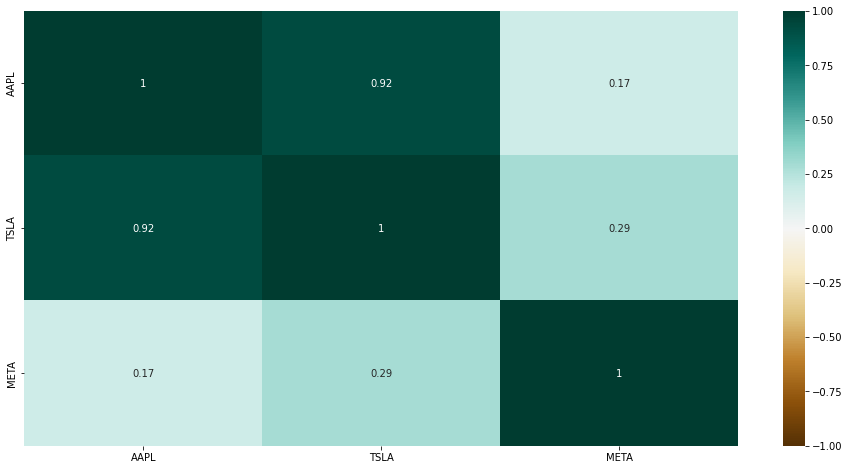

In [11]:
# Merge DataFrames of asset prices on 'Date' column
price = [prices]
df = reduce(lambda left,right: pd.merge(left, right, on = 'Date', how = 'inner'), price)

# Create heatmap of correlation between assets
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG');